### Import nessesary liblaries

In [87]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Reading data

In [88]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# combine the train and test data
data = [train_data, test_data]

In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [91]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
train_data.shape

(891, 12)

In [93]:
test_data.shape

(418, 11)

In [94]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
# getting information about train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
# getting information about test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* 'Ticket' is a mix of numeric and alphanumeric data types
* 'Cabin' is alphanumeric
* 'Cabin', 'Age' ''Embarked' features contain a number of null values in train data
* 'Cabin' and 'Age' features are incomplete in test data
* Seven features are integer or floats in train data
* Six features are  integer or floats in test data
* Five features are strings (object) in both data (train and test)

In [97]:
# getting statictic information for numerical data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* total samples are 891
* 'Survived' is a binary categorical feature with 0 or 1 values
* Around 38% samples survived
* Few olderly passengers within age range 65-80.
* Most passengers did not travel with parents or children ('Parch')
* Almost half  of the passengers had siblings and/or spouse aboard ('SibSP')
* 'Fares' varied significantly with few passengers paying as high as $512


In [98]:
# getting informations about non-numerical data
train_data[['Sex', 'Name', 'Cabin', 'Embarked', 'Ticket']].describe()

,Sex,Name,Cabin,Embarked,Ticket
count,891,891,204,889,891
unique,2,891,147,3,681
top,male,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",B96 B98,S,CA. 2343
freq,577,1,4,644,7


* 'Sex' variable as two possible values (male and female) with 65% male (top=male, freq=577/count=891)
* 'Names' are unique across the dataset (count=unique=891)
* 'Cabin' values have several dupicates across samples. Alternatively several passengers shared a cabin
* 'Embarked' takes three possible values. S port is used by most passengers (top=S)
* 'Ticket' feature has high ratio (22%) of duplicate values (unique=681)

### Analysis of individual variables in terms of the relationship between the variable 'Survived'

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 'Pclass' feature

In [100]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [101]:
# correlation with 'Survived'
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


A significant correlation can be observed between the variable 'Pclass' and the variable 'Survived'. This characteristic will be included in the modeling

#### 'Name' feature

In [102]:
train_data['Name'].value_counts()

Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)    1
Jalsevac, Mr. Ivan                                               1
Kink-Heilmann, Miss. Luise Gretchen                              1
Giglio, Mr. Victor                                               1
Morley, Mr. William                                              1
                                                                ..
Clifford, Mr. George Quincy                                      1
Panula, Master. Eino Viljami                                     1
Herman, Mrs. Samuel (Jane Laver)                                 1
Gronnestad, Mr. Daniel Danielsen                                 1
Smith, Mr. Thomas                                                1
Name: Name, Length: 891, dtype: int64

Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped

#### 'Sex' feature

In [103]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [104]:
train_data[['Sex', 'Survived']].groupby(by=['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Although there were fewer women than men, their survival rate was much higher

#### 'SibSp' feature

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

In [105]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [106]:
train_data[['SibSp', 'Survived']].groupby(by=['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


#### 'Parch' feature

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [107]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [108]:
train_data[['Parch', 'Survived']].groupby(by=['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


'SibSp' and 'Parch' features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features

In [109]:
train_data.groupby(by=['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

#### 'Age' feature

In [110]:
train_data['Age'].value_counts().head(30)

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
35.0    18
32.0    18
27.0    18
26.0    18
16.0    17
31.0    17
33.0    15
34.0    15
23.0    15
20.0    15
39.0    14
42.0    13
40.0    13
17.0    13
45.0    12
38.0    11
4.0     10
2.0     10
50.0    10
47.0     9
Name: Age, dtype: int64

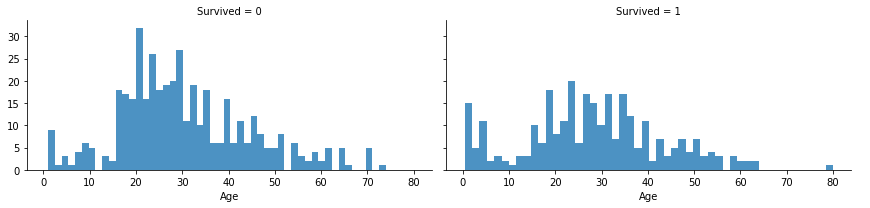

In [111]:
g = sns.FacetGrid(train_data, col='Survived', aspect=2)
g.map(plt.hist, 'Age', bins=50, alpha=0.8)
g.add_legend()

- Children (Age <=4) had high survival rate
- Oldest passengers (Age = 80) survived
- Large number of 15-25 year olds did not survive
- Most passengers are in 15-35 age range

In [112]:
train_data.groupby(by=['Pclass', 'Survived']).agg({'Age':'mean'})

Age
Pclass Survived           
1      0         43.695312
       1         35.368197
2      0         33.544444
       1         25.901566
3      0         26.555556
       1         20.646118

#### Combining multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


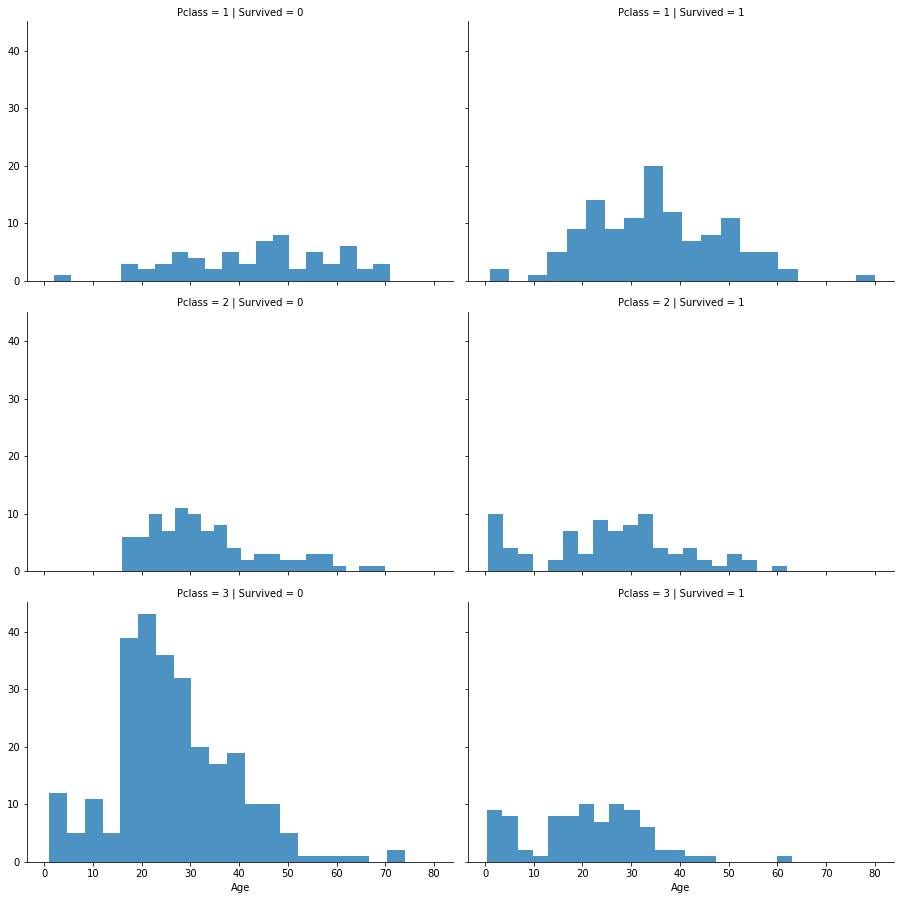

In [113]:
g = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=4.2, aspect=1.5)
g.map(plt.hist, 'Age', bins=20, alpha=0.8)
g.add_legend()

* Pclass varies in terms of Age distribution of passengers
* Pclass=3 had most passengers, however most did not survive
* Children passengers in Pclass=2 and Pclass=3 mostly survived
* Most passengers in Pclass=1 survived

#### 'Embarked' feature

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


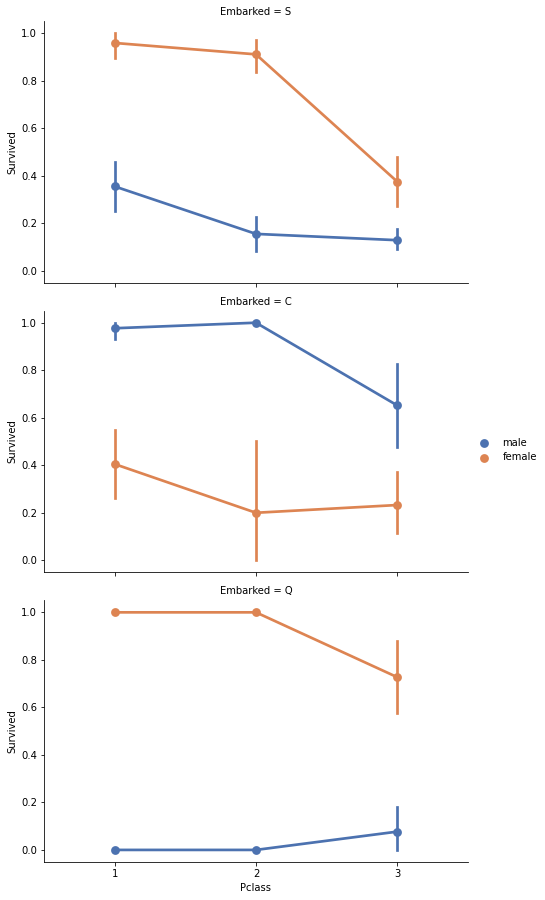

In [114]:
g = sns.FacetGrid(train_data, row='Embarked', size=4.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

* Female passengers had much better survival rate than males
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived

#### 'Fare' feature

In [115]:
train_data.groupby(by=['Pclass', 'Survived']).agg({'Fare':'mean'})

Fare
Pclass Survived           
1      0         64.684008
       1         95.608029
2      0         19.412328
       1         22.055700
3      0         13.669364
       1         13.694887

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


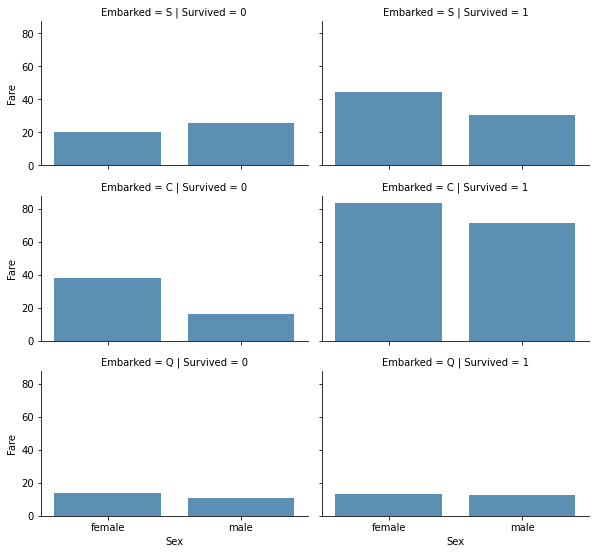

In [116]:
g = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.6, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.8, ci=None)
g.add_legend()

* Higher fare paying passengers had better survival
* Port of embarkation correlates with survival rates

### removal of features that do not affect survival rates

In [117]:
# remove 'Cabin' and 'Ticket' features
train_data = train_data.drop(['Cabin', 'Ticket'], axis=1)
test_data = test_data.drop(['Cabin', 'Ticket'], axis=1)

data = [train_data, test_data]

In [118]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### creating a new feature based on existing features

#### extracting the title from the 'Name' feature and checking if the title is related to the 'Survived' feature 

In [119]:
import re #'\w+\.'

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('\ ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [120]:
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [121]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


#### dropping the 'Name' and 'PassengerId' features from data

In [122]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
data = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

### Converting a categorical feature

In [123]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Estimating and completing features with missing or null values

Correlation among 'Age', 'Sex', and 'Pclass'

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


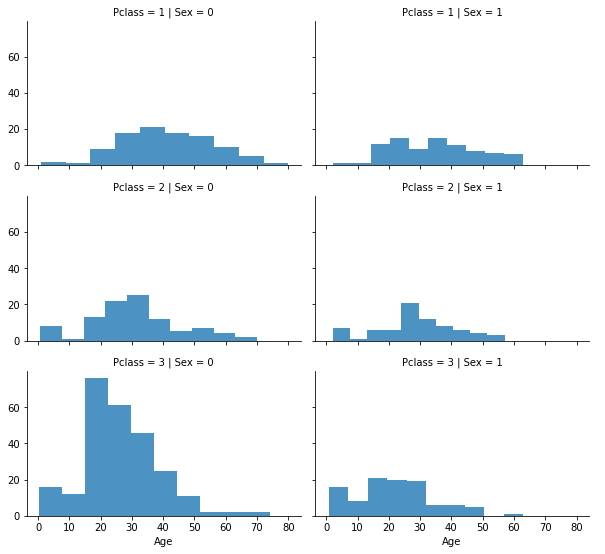

In [124]:
g = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.6, aspect=1.6)
g.map(plt.hist, 'Age', alpha=0.8)
g.add_legend()

In [125]:
train_data['Age'].isna().sum()

177

Preparing an empty array to contain guessed 'Age' values based on 'Pclass' and 'Sex' combinations

In [126]:
fill_age = np.zeros((2,3))
fill_age

array([[0., 0., 0.],
       [0., 0., 0.]])

Guess Age values using median values for Age across sets of Pclass and Gender feature combinations

Iterating over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations (2x3)

In [127]:
for dataset in data:
    
    # drop na
    for i in range (0,2):
        for j in range (0,3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                             (dataset['Pclass'] == j+1)]['Age'].dropna()

            guess_age = guess_df.median()

            fill_age[i,j] = int(guess_age/0.5+0.5)*0.5
    
    # fill null
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), \
                       'Age'] = fill_age[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()
        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [128]:
train_data['Age'].isna().sum()

0

creating 'Age' bands and determining correlations with 'Survived'

In [129]:
train_data['Age_Band'] = pd.cut(train_data['Age'],5)

train_data[['Age_Band', 'Survived']].groupby(['Age_Band'], as_index=False).mean().sort_values(by='Age_Band', ascending=True)

,Age_Band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [130]:
for dataset in data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Band
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [131]:
train_data = train_data.drop(['Age_Band'], axis=1)
data = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Creating a new feature for 'FamilySize' which combines 'Parch' and 'SibSp'

This will enable us to drop 'Parch' and 'SibSp' from our datasets

In [132]:
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [133]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [134]:
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Creating an artificial feature combining 'Pclass' and 'Age'

In [135]:
for dataset in data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Completing a categorical feature

In [136]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [137]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting categorical feature to numeric¶

In [138]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [139]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [141]:
train_data['Fare_Band'] = pd.qcut(train_data['Fare'], 4)
train_data[['Fare_Band', 'Survived']].groupby(['Fare_Band'], as_index=False).mean().sort_values(by='Fare_Band', ascending=True)

,Fare_Band,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [142]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['Fare_Band'], axis=1)
data = [train_data, test_data]
    
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [143]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modelling

In [145]:
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [151]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train)
acc_log

0.8035914702581369

In [152]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, y_train)
acc_svc

0.7822671156004489

In [153]:
# KNeighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.8473625140291807

In [154]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, y_train)
acc_gaussian

0.7227833894500562

In [155]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree

0.867564534231201

In [156]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, Y_train)
acc_random_forest

0.867564534231201

In [159]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.867565
5,Decision Tree,0.867565
1,KNN,0.847363
2,Logistic Regression,0.803591
0,Support Vector Machines,0.782267
4,Naive Bayes,0.722783
